# EDA parte 2 - Geração de Insights

### Principais problemas de negócio
- Previsão de vendas de empresa varejista
- Previsão de custos e margem líquida
- Verficiar projeção de crescimento
- Categorias e produtos em alta, bem como em baixa
- Projeção de lucro e custos por estado 
- Horas com maiores volumes de vendas
- Dia da semana com maiores volumes de vendas

### Novos Insights 

- Elaborar DF com quantidades vendidas por mês para cada produto, para então verificar se a tendência é crescer ou diminuir 
- Utilizar o gráfico de margem liquida para elaborar uma preisão de crescimento ou n, utilizando regressão para o primeiro mês
- Verificar a quantidade prevista para venda de cada produto com regressão linear, com isso, verificar os custos e projeção de lucros por produto 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [2]:
# Importação do dataset
data = pd.read_csv('../data/dados_vendas_att2.csv', sep=',')

In [3]:
data.rename(columns={'Custo_Produto': 'Custo_Pedido'}, inplace= True)

In [4]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
106550,Fone de Ouvido Sem Fio,Alimentação,1,11.99,5.9950,11.99,5.9950,CA,San Francisco,20,2019-08-17,Sábado
171165,Apple Airpods,Eletrônica,1,150.00,97.5000,150.00,52.5000,NY,New York City,23,2019-12-15,Domingo
144849,"Monitor Ultrawide 34""",Eletrônica,1,379.99,125.3967,379.99,254.5933,CA,Los Angeles,21,2019-11-18,Segunda-Feira
136357,Notebook Macbook Pro,Roupas,1,1700.00,561.0000,1700.00,1139.0000,CA,San Francisco,19,2019-10-16,Quarta-Feira
71976,Cabo de Carregamento USB-C,Esportes,1,11.95,5.9750,11.95,5.9750,WA,Seattle,16,2019-06-01,Sábado


In [5]:
data['Data_Venda'] = pd.to_datetime(data['Data_Venda'])

In [6]:
data['Mes'] = data['Data_Venda'].dt.month

In [7]:
# ALTERAÇÃO DAS CATEGORIAS, POIS ESTÁ DESCONFORME 
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
64665,Google Phone,Esportes,1,600.00,198.000,600.00,402.000,CA,San Francisco,9,2019-05-05,Domingo,5
4109,Fone de Ouvido Sem Fio,Roupas,1,11.99,5.995,11.99,5.995,CA,San Francisco,22,2019-01-10,Quinta-Feria,1
5656,Cabo de Carregamento Turbo,Eletrônica,1,14.95,7.475,14.95,7.475,CA,San Francisco,11,2019-01-13,Domingo,1
183817,Cabo de Carregamento USB-C,Roupas,1,11.95,5.975,11.95,5.975,CA,San Francisco,11,2019-12-05,Quinta-Feria,12
71639,Cabo de Carregamento USB-C,Roupas,1,11.95,5.975,11.95,5.975,CA,San Francisco,0,2019-05-09,Quinta-Feria,5


In [8]:
map_perifericos = ['Fone de Ouvido Sem Fio', 'Apple Airpods', 'Fone de Ouvido Esportivo Bose']
map_alimentacao = ['Cabo de Carregamento USB-C', 'Cabo de Carregamento Turbo', 'Pilhas AAA (4 Unidades)', 'Pilhas AA (4 Unidades)']
map_eletronicos = ['iPhone', 'Google Phone', 'Smartphone Vareebadd','Notebook ThinkPad']
map_monitores = ['Notebook Macbook Pro', 'Monitor 20"', 'Monitor 27" Full HD', 'Monitor gamer 27" 4K', 'Monitor Ultrawide 34"','TV Tela Plana']
map_eletricos = ['Máquina de Lavar Roupas LG', 'Secador LG']

data['Categoria'] = np.where(data['Produto'].isin(map_perifericos), 'Perifericos', 
                    np.where(data['Produto'].isin(map_alimentacao), 'Alimentacao',
                    np.where(data['Produto'].isin(map_eletronicos), 'Eletronicos',
                    np.where(data['Produto'].isin(map_monitores), 'Monitores',
                    np.where(data['Produto'].isin(map_eletricos), 'Eletricos', 'Outros')))))

In [9]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Mes
167528,Pilhas AA (4 Unidades),Alimentacao,1,3.84,1.9200,3.84,1.9200,TX,Austin,22,2019-12-18,Quarta-Feira,12
105169,Fone de Ouvido Esportivo Bose,Perifericos,1,99.99,49.9950,99.99,49.9950,MA,Boston,18,2019-08-15,Quinta-Feria,8
110951,"Monitor Ultrawide 34""",Monitores,1,379.99,125.3967,379.99,254.5933,CA,San Francisco,13,2019-08-06,Terça-Feira,8
123247,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.4750,14.95,7.4750,CA,San Francisco,15,2019-10-23,Quarta-Feira,10
175021,Cabo de Carregamento Turbo,Alimentacao,1,14.95,7.4750,14.95,7.4750,NY,New York City,21,2019-12-18,Quarta-Feira,12


### Geração de Insight e Análise nos dados
---------------------

#### Horários e Dias com as maiores saídas 

In [10]:
# horários e dias com maiores saídas de vendas

df_dia = data.groupby('Dia_Semana')[['Faturamento']].agg('sum').reset_index()
df_dia.head()


,Dia_Semana,Faturamento
0,Domingo,4932169.66
1,Quarta-Feira,4988822.26
2,Quinta-Feria,4839465.16
3,Segunda-Feira,4883326.72
4,Sexta-Feira,4855938.38


In [11]:
df_hora = data.groupby('Horario_Venda')[['Faturamento', 'Quantidade_Comprada']].agg('sum').reset_index()
df_hora



,Horario_Venda,Faturamento,Quantidade_Comprada
0,0,713721.27,4428
1,1,460866.88,2619
2,2,234851.44,1398
3,3,145757.89,928
4,4,162661.01,937
5,5,230679.82,1493
6,6,448113.00,2810
7,7,744854.12,4556
8,8,1192348.97,7002
9,9,1639030.58,9816


Text(0, 0.5, 'Faturamento')

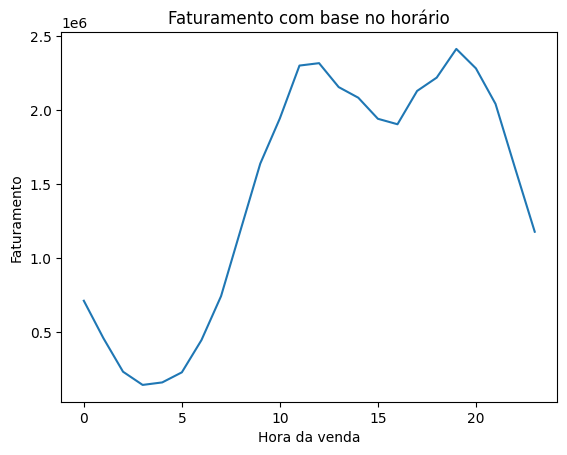

In [12]:
sns.lineplot(x="Horario_Venda", y="Faturamento",
             data=df_hora)
plt.title("Faturamento com base no horário")
plt.xlabel("Hora da venda")
plt.ylabel("Faturamento")

### Panoramas por Estado e cidade
--------

In [13]:
df_estado = data.groupby(['Estado', 'Cidade'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado


,Estado,Cidade,Faturamento,Quantidade_Comprada
1,CA,San Francisco,8262203.91,50239
0,CA,Los Angeles,5452570.80,33289
5,NY,New York City,4664317.43,27932
3,MA,Boston,3661642.01,22528
2,GA,Atlanta,2795498.58,16602
8,TX,Dallas,2767975.40,16730
9,WA,Seattle,2747755.48,16553
6,OR,Portland,1870732.34,11303
7,TX,Austin,1819581.75,11153
4,ME,Portland,449758.27,2750


In [14]:
# produtos com maiores saídas por estado

df_estado_produtos = data.groupby(['Estado', 'Produto'])[['Faturamento', 'Quantidade_Comprada']].sum().reset_index().sort_values(by = 'Faturamento', ascending= False)
df_estado_produtos.head()

,Estado,Produto,Faturamento,Quantidade_Comprada
11,CA,Notebook Macbook Pro,3207900.00,1887
18,CA,iPhone,1945300.00,2779
12,CA,Notebook ThinkPad,1603983.96,1604
5,CA,Google Phone,1323600.00,2206
87,NY,Notebook Macbook Pro,1116900.00,657


#### Faturamento Temporal

In [15]:
# Margens e volume de entrada e saída de dinheiro

df_faturamento = data[data['Data_Venda'] != '2020-01-01	'].groupby('Data_Venda')[['Custo',	'Faturamento',	'Lucro_Bruto']].sum()

In [16]:
df_faturamento

,Custo,Faturamento,Lucro_Bruto
Data_Venda,,,
2019-01-01,23772.6098,65681.94,41909.3302
2019-01-02,26797.1171,70813.20,44016.0829
2019-01-03,18229.2163,47046.20,28816.9837
2019-01-04,23159.1179,62012.21,38853.0921
2019-01-05,18117.6311,46524.63,28406.9989
...,...,...,...
2019-12-27,48859.3890,126628.05,77768.6610
2019-12-28,52265.4692,134015.50,81750.0308
2019-12-29,59539.0440,156024.62,96485.5760


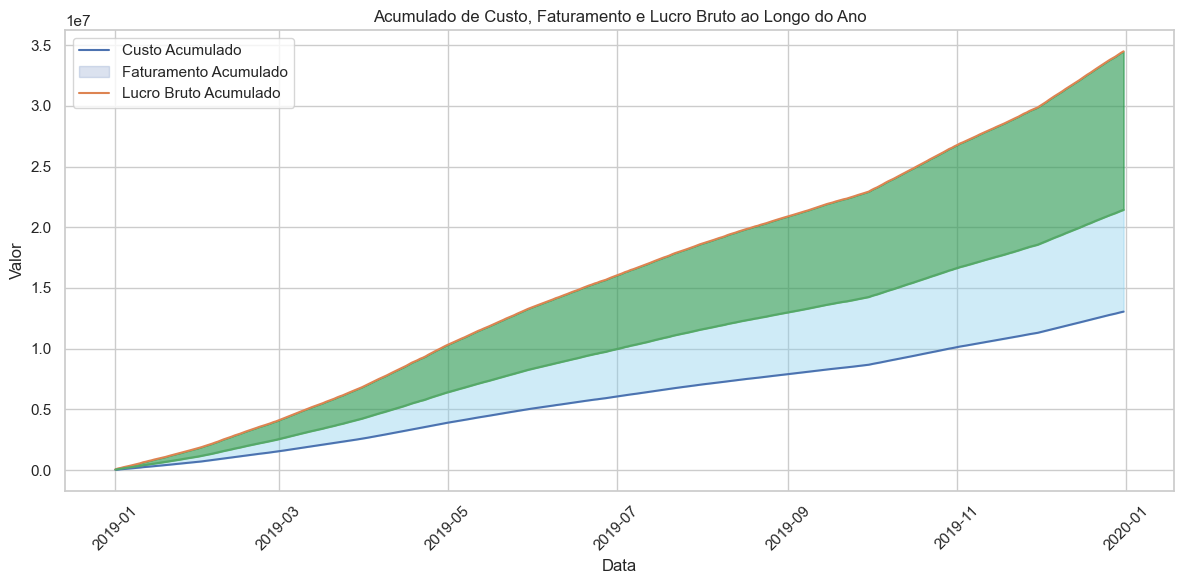

In [20]:

# Calcular os acumulados
df_acumulado = df_faturamento.cumsum()

# Plotar o gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Plotar as linhas
sns.lineplot(data=df_acumulado, dashes=False)

# Preencher a área sob as curvas
plt.fill_between(df_acumulado.index, df_acumulado['Custo'], df_acumulado['Faturamento'], color='skyblue', alpha=0.4)
plt.fill_between(df_acumulado.index, df_acumulado['Faturamento'], df_acumulado['Lucro_Bruto'], color='green', alpha=0.4)

# Adicionar legendas e título
plt.legend(labels=['Custo Acumulado', 'Faturamento Acumulado', 'Lucro Bruto Acumulado'], loc='upper left')
plt.title('Acumulado de Custo, Faturamento e Lucro Bruto ao Longo do Ano')
plt.xlabel('Data')
plt.ylabel('Valor')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

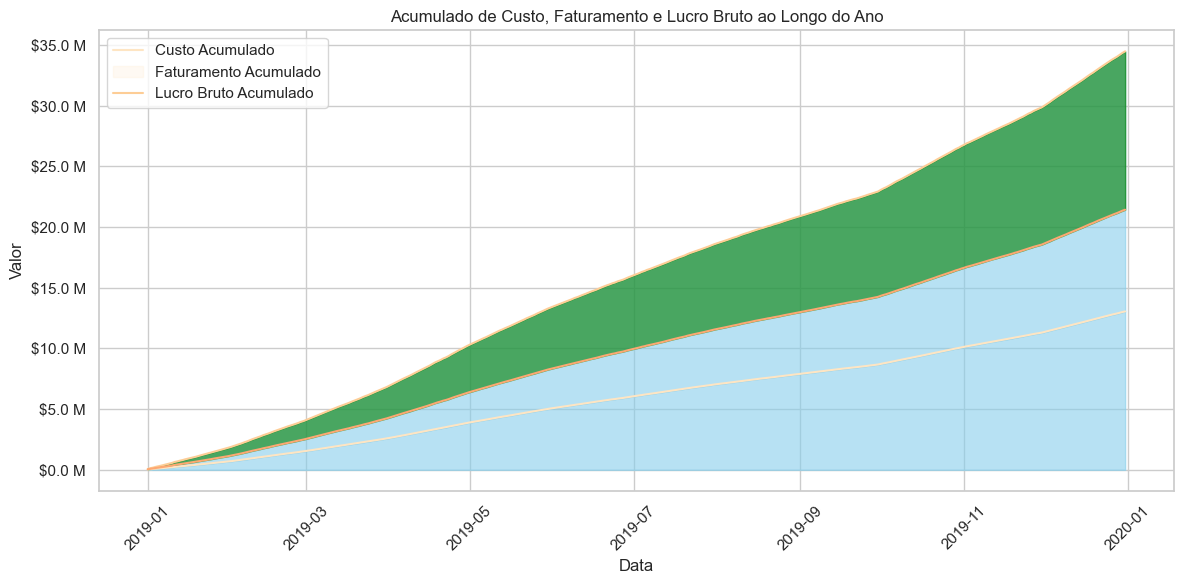

In [29]:
df_acumulado = df_faturamento.cumsum()

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Plotar as linhas
sns.lineplot(data=df_acumulado, dashes=False)

# Preencher a área sob as curvas
plt.fill_between(df_acumulado.index, df_acumulado['Custo'], color='skyblue', alpha=0.6)
plt.fill_between(df_acumulado.index, df_acumulado['Custo'], df_acumulado['Faturamento'], color='skyblue', alpha=0.6)
plt.fill_between(df_acumulado.index, df_acumulado['Faturamento'], df_acumulado['Lucro_Bruto'], color='green', alpha=0.6)

# Adicionar legendas e título
plt.legend(labels=['Custo Acumulado', 'Faturamento Acumulado', 'Lucro Bruto Acumulado'], loc='upper left')
plt.title('Acumulado de Custo, Faturamento e Lucro Bruto ao Longo do Ano')
plt.xlabel('Data')
plt.ylabel('Valor')

# Formatar valores do eixo x
from matplotlib.ticker import FuncFormatter

def formatar_milhoes(valor, pos):
    return f'${valor / 1e6:.1f} M'

formatter = FuncFormatter(formatar_milhoes)
plt.gca().yaxis.set_major_formatter(formatter)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Utilizar a paleta OrRd
sns.set_palette("OrRd")

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [41]:
df_faturamento_att = df_faturamento[['Faturamento', 'Lucro_Bruto', 'Custo']]
df_faturamento_att

,Faturamento,Lucro_Bruto,Custo
Data_Venda,,,
2019-01-01,65681.940,41909.330,23772.610
2019-01-02,70813.200,44016.083,26797.117
2019-01-03,47046.200,28816.984,18229.216
2019-01-04,62012.210,38853.092,23159.118
2019-01-05,46524.630,28406.999,18117.631
...,...,...,...
2019-12-27,126628.050,77768.661,48859.389
2019-12-28,134015.500,81750.031,52265.469
2019-12-29,156024.620,96485.576,59539.044


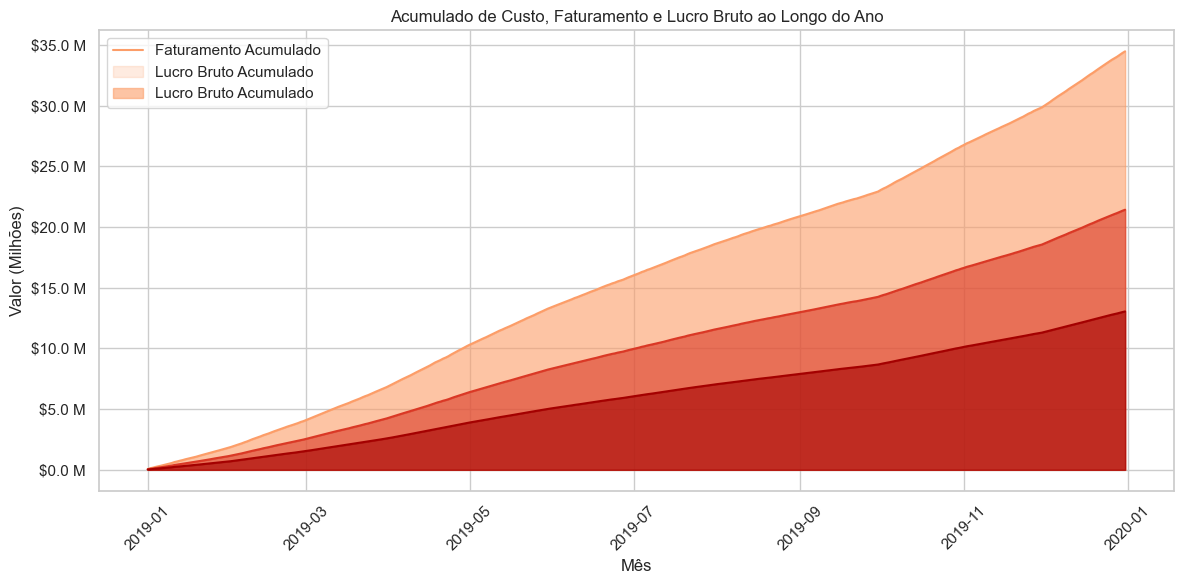

In [56]:
# Calcular os acumulados
df_acumulado = df_faturamento_att.cumsum()

cores = ["#fc9d68", "#DA3825", "#A40000"]

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Plotar as linhas e preencher as áreas
for i, coluna in enumerate(df_acumulado.columns):
    sns.lineplot(data=df_acumulado[coluna], dashes=False, color=cores[i])
    plt.fill_between(df_acumulado.index, df_acumulado[coluna], color=cores[i], alpha=0.6)

# Adicionar legendas e título
plt.legend(labels=['Faturamento Acumulado', 'Lucro Bruto Acumulado', 'Lucro Bruto Acumulado'], loc='upper left')
plt.title('Acumulado de Custo, Faturamento e Lucro Bruto ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Valor (Milhões)')

# Formatar valores do eixo y
def formatar_milhoes(valor, pos):
    return f'${valor / 1e6:.1f} M'

formatter = FuncFormatter(formatar_milhoes)
plt.gca().yaxis.set_major_formatter(formatter)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

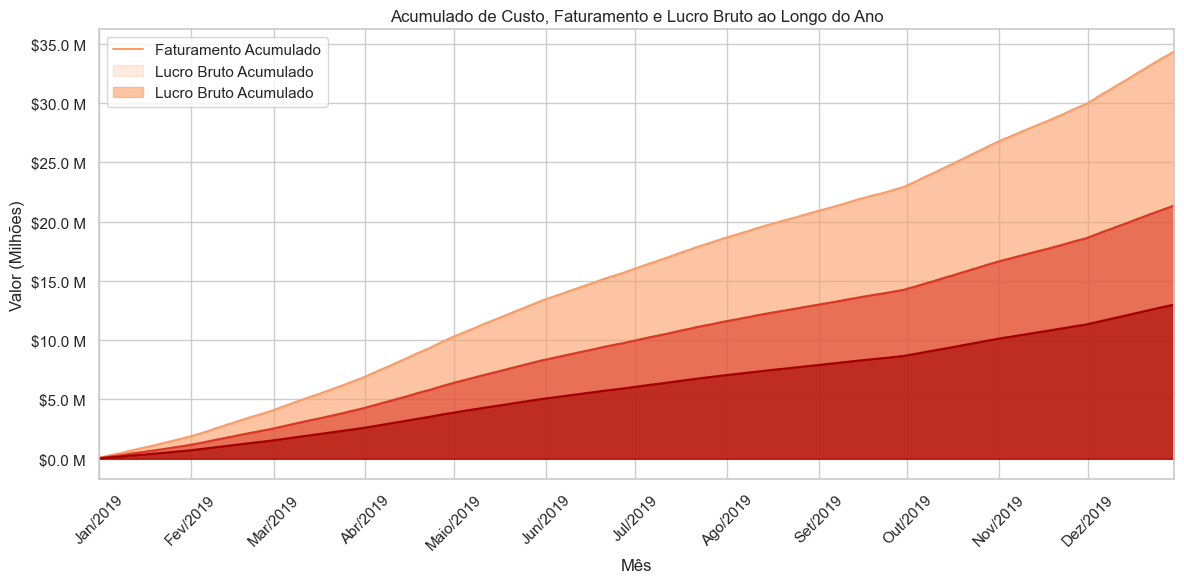

In [59]:
df_acumulado = df_faturamento_att.cumsum()

cores = ["#fc9d68", "#DA3825", "#A40000"]

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Plotar as linhas e preencher as áreas
for i, coluna in enumerate(df_acumulado.columns):
    sns.lineplot(data=df_acumulado[coluna], dashes=False, color=cores[i])
    plt.fill_between(df_acumulado.index, df_acumulado[coluna], color=cores[i], alpha=0.6)

# Adicionar legendas e título
plt.legend(labels=['Faturamento Acumulado', 'Lucro Bruto Acumulado', 'Lucro Bruto Acumulado'], loc='upper left')
plt.title('Acumulado de Custo, Faturamento e Lucro Bruto ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Valor (Milhões)')

# Formatar valores do eixo y
def formatar_milhoes(valor, pos):
    return f'${valor / 1e6:.1f} M'

formatter = FuncFormatter(formatar_milhoes)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustar limites do eixo x para excluir janeiro de 2020
plt.xlim(df_acumulado.index[0], df_acumulado.index[-2])

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
map_data = {
    '2019-01-01': 'Jan/2019',
    '2019-02-01': 'Fev/2019',
    '2019-03-01': 'Mar/2019',
    '2019-04-01': 'Abr/2019',
    '2019-05-01': 'Maio/2019',
    '2019-06-01': 'Jun/2019',
    '2019-07-01': 'Jul/2019',
    '2019-08-01': 'Ago/2019',
    '2019-09-01': 'Set/2019',
    '2019-10-01': 'Out/2019',
    '2019-11-01': 'Nov/2019',
    '2019-12-01': 'Dez/2019',
}
plt.xticks(list(map_data.keys()), list(map_data.values()), rotation=45)
# Exibir o gráfico
plt.tight_layout()
plt.show()

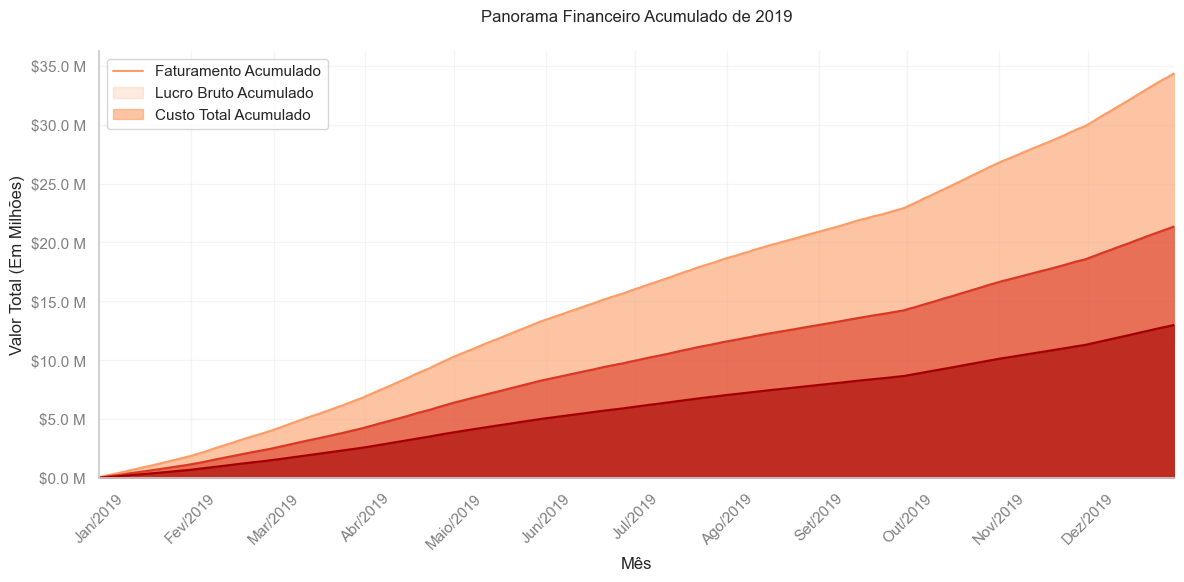

In [74]:
df_acumulado = df_faturamento_att.cumsum()

cores = ["#fc9d68", "#DA3825", "#A40000"]

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Plotar as linhas e preencher as áreas
for i, coluna in enumerate(df_acumulado.columns):
    sns.lineplot(data=df_acumulado[coluna], dashes=False, color=cores[i])
    plt.fill_between(df_acumulado.index, df_acumulado[coluna], color=cores[i], alpha=0.6)

# Adicionar legendas e título
plt.legend(labels=['Faturamento Acumulado', 'Lucro Bruto Acumulado', 'Custo Total Acumulado'], loc='upper left')
plt.title('Panorama Financeiro Acumulado de 2019', y= 1.05)
plt.xlabel('Mês')
plt.ylabel('Valor Total (Em Milhões)')

# Formatar valores do eixo y
def formatar_milhoes(valor, pos):
    return f'${valor / 1e6:.1f} M'

formatter = FuncFormatter(formatar_milhoes)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustar limites do eixo x para excluir janeiro de 2020
plt.xlim(df_acumulado.index[0], df_acumulado.index[-2])

# Ajustar o limite inferior do eixo y
plt.ylim(bottom=0)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
map_data = {
    '2019-01-01': 'Jan/2019',
    '2019-02-01': 'Fev/2019',
    '2019-03-01': 'Mar/2019',
    '2019-04-01': 'Abr/2019',
    '2019-05-01': 'Maio/2019',
    '2019-06-01': 'Jun/2019',
    '2019-07-01': 'Jul/2019',
    '2019-08-01': 'Ago/2019',
    '2019-09-01': 'Set/2019',
    '2019-10-01': 'Out/2019',
    '2019-11-01': 'Nov/2019',
    '2019-12-01': 'Dez/2019',
}
plt.xticks(list(map_data.keys()), list(map_data.values()), rotation=45, color = 'grey')
plt.yticks(color = 'grey')

plt.grid(alpha=0.2)

sns.despine()
# Exibir o gráfico
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Lucro_Bruto (U$)')

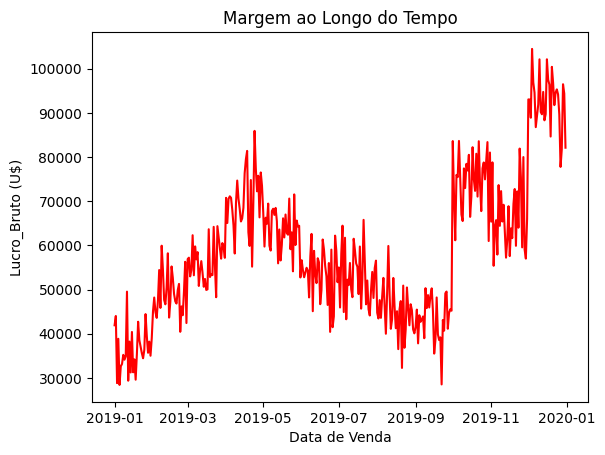

In [17]:
''' Margem de Lucro por dia '''

sns.lineplot(x="Data_Venda", y="Lucro_Bruto",
             data=df_faturamento, color= "red")
plt.title("Margem ao Longo do Tempo")
plt.xlabel("Data de Venda")
plt.ylabel("Lucro_Bruto (U$)")


## Desempenho Financeiro Total 
-----------------------

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Transformar o DataFrame em um formato longo (melt)
faturamento_mes_melted = faturamento_mes.melt(id_vars=['Mes'], var_name='Conta', value_name='Valor')

# Criar o catplot
plt.figure(figsize=(10, 6))
g = sns.catplot(x='Mes', y='Valor', hue='Conta', data=faturamento_mes_melted, kind='point', markers='o', aspect=2, palette='OrRd')

# Personalizar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Desempenho Financeiro / 2019')

# Personalizar eixo y para representar valores em milhões
def millions_formatter(x, pos):
    return f'${x}'

g.set_xticklabels(color = 'grey')  # Rotacionar rótulos do eixo x
g.set_yticklabels(color = 'grey')  # Rotacionar rótulos do eixo x
g.ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Aplicar formatação de milhões no eixo y
g.ax.spines['bottom'].set_color('lightgrey')  # Define a cor cinza para a linha do eixo x
g.ax.spines['left'].set_color('lightgrey')    # Define a cor cinza para a linha do eixo y
# Definir cor cinza para a borda do eixo y

# Adicionar linhas de grade horizontais pontilhadas
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# Exibir o gráfico
plt.show()

# Restaurar a configuração padrão após a exibição do gráfico
pd.set_option('display.float_format', None)

NameError: name 'faturamento_mes' is not defined

In [103]:
data.groupby('Produto')['Faturamento'].sum()

Produto
Apple Airpods                   2349150.00
Cabo de Carregamento Turbo       347094.15
Cabo de Carregamento USB-C       286501.25
Fone de Ouvido Esportivo Bose   1345565.43
Fone de Ouvido Sem Fio           246478.43
Google Phone                    3319200.00
Monitor 20"                      454148.71
Monitor 27" Full HD             1132424.50
Monitor Ultrawide 34"           2355558.01
Monitor gamer 27" 4K            2435097.56
Máquina de Lavar Roupas LG       399600.00
Notebook Macbook Pro            8037600.00
Notebook ThinkPad               4129958.70
Pilhas AA (4 Unidades)           106118.40
Pilhas AAA (4 Unidades)           92740.83
Secador LG                       387600.00
Smartphone Vareebadd             827200.00
TV Tela Plana                   1445700.00
iPhone                          4794300.00
Name: Faturamento, dtype: float64

### Panorama de Saídas por Produtos e Faturamento por porduto 
------------

In [79]:
panorama = data.groupby('Produto')[['Faturamento', 'Custo', 'Quantidade_Comprada']].sum().reset_index()

In [80]:
panorama

,Produto,Faturamento,Custo,Quantidade_Comprada
0,Apple Airpods,2349150.000,1526947.500,15661
1,Cabo de Carregamento Turbo,347094.150,173547.075,23217
2,Cabo de Carregamento USB-C,286501.250,143250.625,23975
3,Fone de Ouvido Esportivo Bose,1345565.430,672782.715,13457
4,Fone de Ouvido Sem Fio,246478.430,123239.215,20557
5,Google Phone,3319200.000,1095336.000,5532
6,"Monitor 20""",454148.710,295196.661,4129
7,"Monitor 27"" Full HD",1132424.500,736075.925,7550
8,"Monitor Ultrawide 34""",2355558.010,777334.143,6199
9,"Monitor gamer 27"" 4K",2435097.560,803582.195,6244


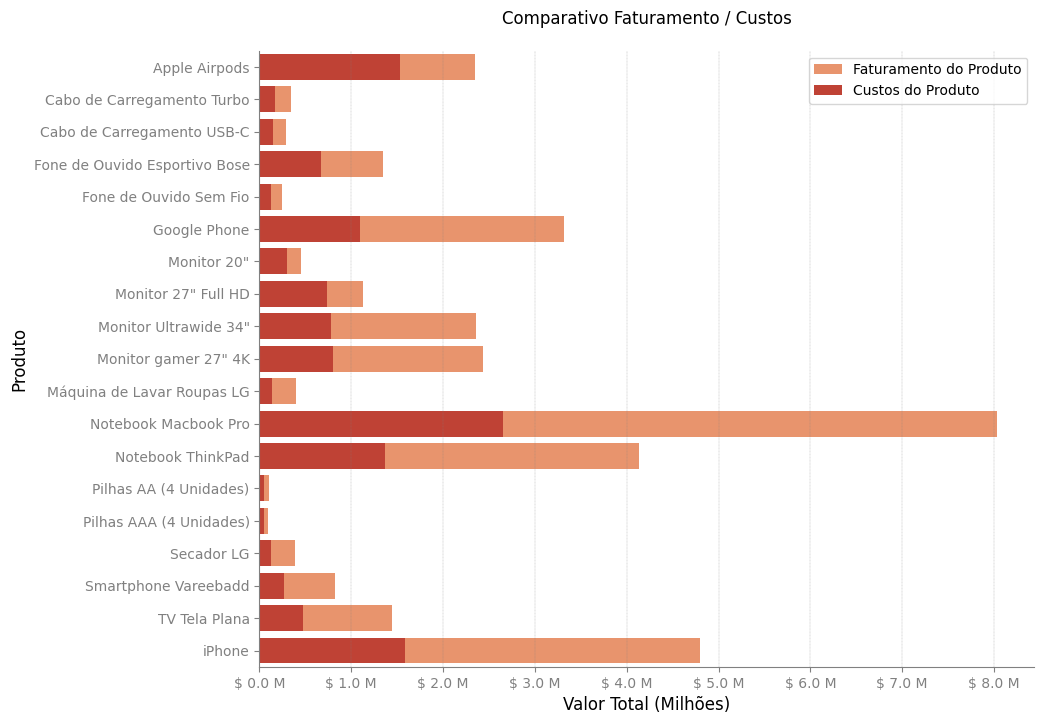

In [96]:
# Convertendo valores do eixo X (Faturamento e Custo) para milhões
panorama['Faturamento (Milhões)'] = panorama['Faturamento'] / 1000000
panorama['Custo (Milhões)'] = panorama['Custo'] / 1000000

# Função para formatar os rótulos do eixo x
def format_millions(x, pos):
    return f'$ {x:.1f} M'

# Plotagem utilizando Seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Faturamento (Milhões)', y='Produto', data=panorama, label='Faturamento do Produto', color= "#fc8c59")
ax = sns.barplot(x='Custo (Milhões)', y='Produto', data=panorama, color='#d62f1e', label='Custos do Produto')
ax.xaxis.set_major_formatter(FuncFormatter(format_millions))
ax.grid(axis='x', linestyle='--', linewidth=0.2, color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
            # Definir as outras duas bordas para cinza
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
            # Definir a cor dos ticks para cinza
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

plt.xlabel('Valor Total (Milhões)',  fontsize = 12)
plt.ylabel('Produto', fontsize = 12)
plt.title('Comparativo Faturamento / Custos', y = 1.03)
plt.legend()


plt.show()


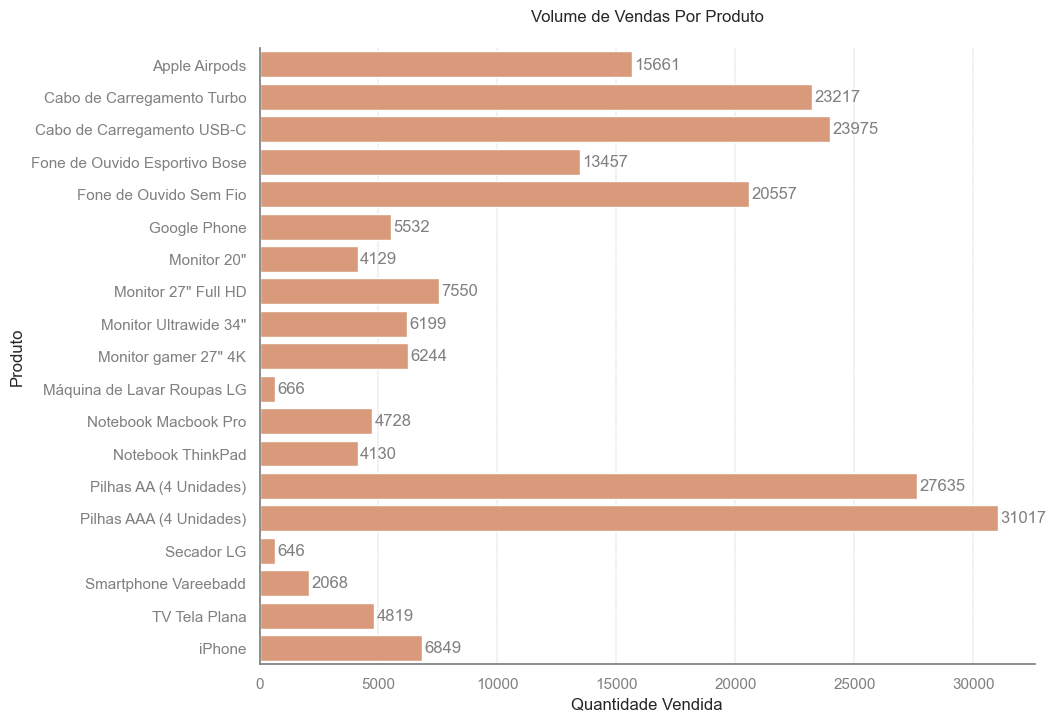

In [86]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Quantidade_Comprada', y='Produto', data=panorama, color='#E8946D')

# Adicionando as quantidades ao lado direito do final de cada barra
for i, v in enumerate(panorama['Quantidade_Comprada']):
    ax.text(v + 100, i, str(v), color='grey', va='center')

# ax.grid(axis='x', linestyle='--', linewidth=0.2, color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Definir as outras duas bordas para cinza
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
# Definir a cor dos ticks para cinza
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.grid(axis='x', linestyle='--', linewidth=0.2, color='grey')


plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)
plt.title('Volume de Vendas Por Produto', y=1.03)

plt.show()

In [113]:
df_faturamento_por_produto = data.groupby(['Cidade', 'Mes', 'Categoria'])[['Faturamento',	'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
df_faturamento_por_produto

,Cidade,Mes,Categoria,Faturamento,Lucro_Bruto
478,San Francisco,12,Monitores,537582.050,342926.853
468,San Francisco,10,Monitores,401563.970,256888.769
477,San Francisco,12,Eletronicos,396998.820,265989.209
438,San Francisco,4,Monitores,376934.470,241830.073
443,San Francisco,5,Monitores,368944.910,235894.712
...,...,...,...,...,...
401,Portland,9,Eletricos,1800.000,1206.000
366,Portland,2,Eletricos,1800.000,1206.000
206,Dallas,6,Eletricos,1800.000,1206.000
361,Portland,1,Eletricos,1200.000,804.000


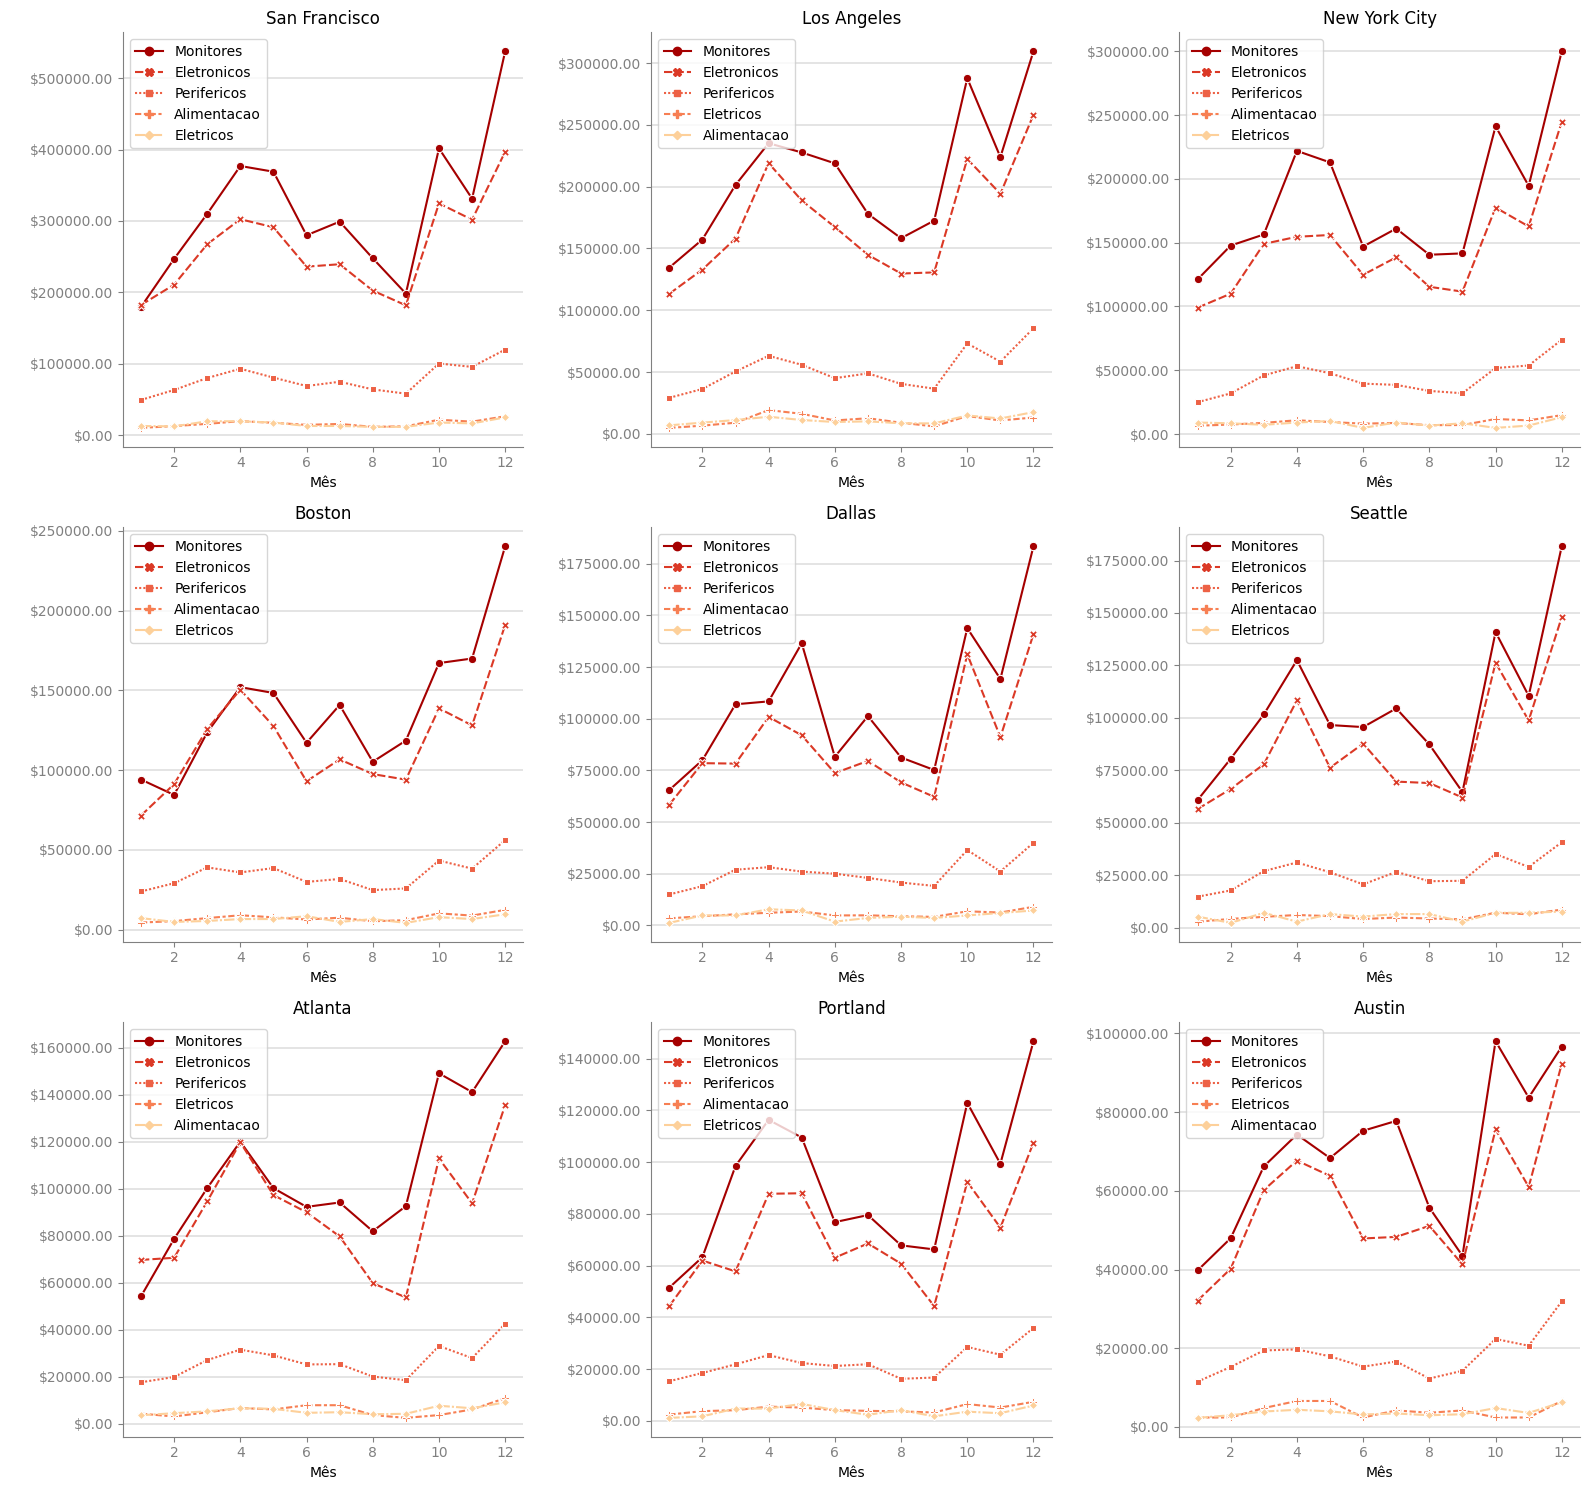

In [174]:
# Definindo a paleta de cores
palette = sns.color_palette("OrRd", 10)

# Lista de cores desejadas
cores_intercaladas = [palette[8], palette[7], palette[6], palette[5], palette[2]]

cidades = df_faturamento_por_produto['Cidade'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(16, 15))

# Loop para criar gráficos separados para cada cidade (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(cidades):
            cidade = cidades[i * 3 + j]
            cidade_df = df_faturamento_por_produto[df_faturamento_por_produto['Cidade'] == cidade]
            
            # Crie um gráfico de linha para a cidade atual
            sns.lineplot(x="Mes", y="Faturamento", hue="Categoria", style="Categoria", 
                         data=cidade_df, ax=ax, palette=cores_intercaladas, markers=True)
            ax.set_title(cidade)
            ax.set_xlabel('Mês')
            ax.set_ylabel(' ')
            ax.legend(loc='upper left')

            # Remover as bordas direita e superior
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            # Definir as outras duas bordas para cinza
            ax.spines['left'].set_color('grey')
            ax.spines['bottom'].set_color('grey')
            # Definir a cor dos ticks para cinza
            ax.tick_params(axis='x', colors='grey')
            ax.tick_params(axis='y', colors='grey')
            # Adicionar grid apenas no eixo y com a cor cinza
            ax.grid(axis='y', linestyle='-', linewidth=0.3, color='grey')
            
            # Adicionar o símbolo "$" antes dos rótulos dos eixos y (yticks)
            yticks = ax.get_yticks()
            ax.set_yticklabels(['${:.2f}'.format(ytick) for ytick in yticks])

# Remova quaisquer subplots não utilizados
for i in range(len(cidades), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

In [151]:
map_data = {
 '2019-02-01': 'Fev/2019',
 '2019-04-01': 'Abr/2019',
 '2019-06-01': 'Jun/2019',
 '2019-08-01': 'Ago/2019',
 '2019-10-01': 'Out/2019',
 '2019-12-01': 'Dez/2019',
 '2020-01-01': 'Jan/2020',
}
cidade_df['Mes'] = cidade_df['Mes'].map(map_data)

# Crie um gráfico de linha para a cidade atual
sns.lineplot(x="Mes", y="Faturamento", hue="Categoria", data=cidade_df, ax=ax, palette="OrRd")

C:\Users\alyss\AppData\Local\Temp\ipykernel_5720\1629091274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidade_df['Mes'] = cidade_df['Mes'].map(map_data)


KeyError: 'x'

#### Verificando Margem de Lucro por Produtos

In [30]:
'''Avaliação da Margem de lucro por produtos'''

df_avaliacao_produto = data[data['Quantidade_Comprada'] == 1].groupby('Produto')[['Preco_Unitario',	'Custo']].agg('min').reset_index()
df_avaliacao_produto['Margem_Lucro'] = (1 - (df_avaliacao_produto['Custo'] / df_avaliacao_produto['Preco_Unitario'])) * 100
df_avaliacao_produto.sort_values(by = 'Margem_Lucro', ascending= False, inplace= True)

df_avaliacao_produto['Margem_PCT'] = round(df_avaliacao_produto['Margem_Lucro'], 2).astype(str) + ' %'
df_avaliacao_produto

,Produto,Preco_Unitario,Custo,Margem_Lucro,Margem_PCT
9,"Monitor gamer 27"" 4K",389.990,128.697,67.000,67.0 %
8,"Monitor Ultrawide 34""",379.990,125.397,67.000,67.0 %
17,TV Tela Plana,300.000,99.000,67.000,67.0 %
16,Smartphone Vareebadd,400.000,132.000,67.000,67.0 %
15,Secador LG,600.000,198.000,67.000,67.0 %
12,Notebook ThinkPad,999.990,329.997,67.000,67.0 %
11,Notebook Macbook Pro,1700.000,561.000,67.000,67.0 %
10,Máquina de Lavar Roupas LG,600.000,198.000,67.000,67.0 %
18,iPhone,700.000,231.000,67.000,67.0 %
5,Google Phone,600.000,198.000,67.000,67.0 %


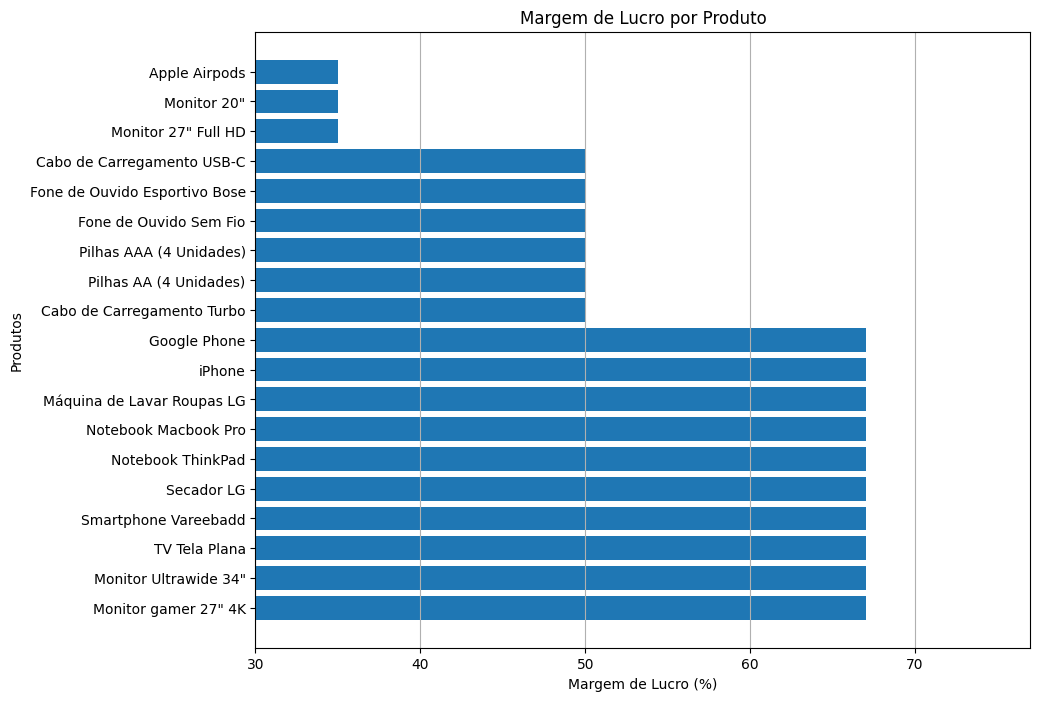

In [31]:
plt.figure(figsize=(10, 8))
plt.barh(df_avaliacao_produto['Produto'], df_avaliacao_produto['Margem_Lucro'])
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produtos')
plt.title('Margem de Lucro por Produto')
plt.xlim(30, max(df_avaliacao_produto['Margem_Lucro']) + 10)  # O segundo argumento pode ser ajustado conforme necessário
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

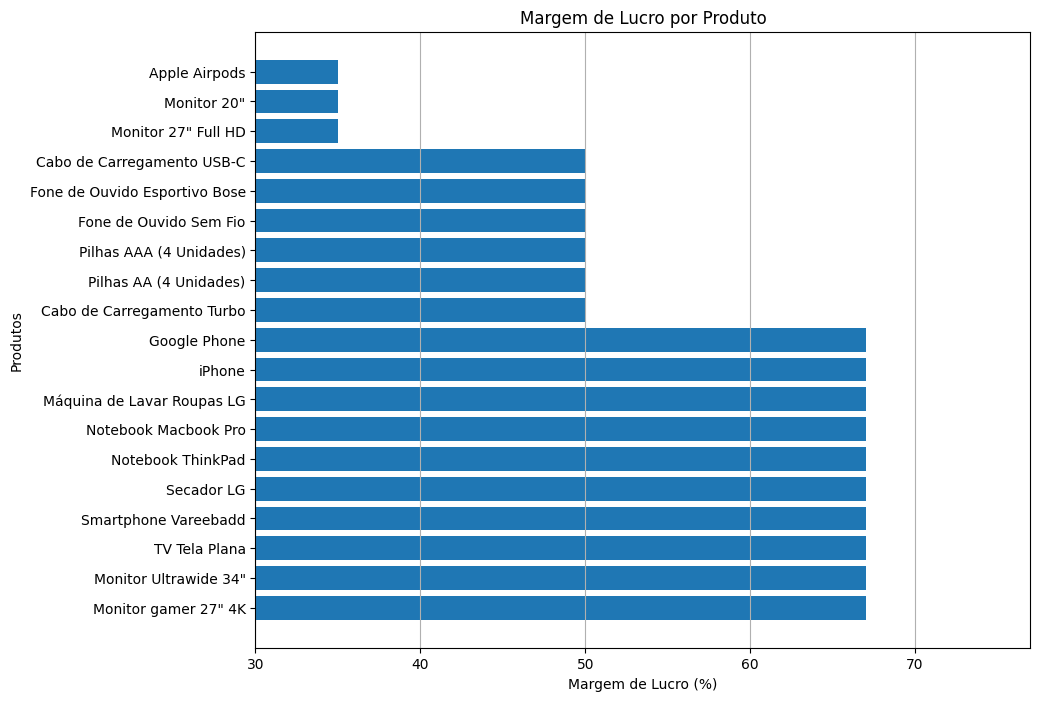

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(df_avaliacao_produto['Produto'], df_avaliacao_produto['Margem_Lucro'])
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produtos')
plt.title('Margem de Lucro por Produto')
plt.xlim(30, max(df_avaliacao_produto['Margem_Lucro']) + 10)  # O segundo argumento pode ser ajustado conforme necessário
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
ax = sns.barplot(x='Quantidade', y='Produto', data=contagem, palette='OrRd')  # Cria o gráfico com Seaborn

# Adicionando os valores nas pontas das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='gray', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Quantidade')  # Adiciona o rótulo do eixo x
plt.ylabel('Produto')     # Adiciona o rótulo do eixo y
plt.title('Ocorrência de Produtos', y = 1.02)  # Adiciona o título do gráfico
plt.yticks(color = 'gray')
plt.xticks(color = 'gray')
sns.despine(left=True, right=True, top=True)
plt.show()

In [32]:
'''
Verificar 
'''
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
84079,iPhone,Eletrônica,1,700.000,231.000,700.000,469.000,CA,Los Angeles,12,2019-06-18,Terça-Feira
82748,Cabo de Carregamento USB-C,Roupas,1,11.950,5.975,11.950,5.975,WA,Seattle,9,2019-06-11,Terça-Feira
24084,"Monitor gamer 27"" 4K",Alimentação,1,389.990,128.697,389.990,261.293,WA,Seattle,18,2019-03-17,Domingo
17437,"Monitor Ultrawide 34""",Roupas,1,379.990,125.397,379.990,254.593,TX,Dallas,19,2019-02-26,Terça-Feira
160028,Fone de Ouvido Esportivo Bose,Roupas,1,99.990,49.995,99.990,49.995,CA,San Francisco,11,2019-11-25,Segunda-Feira


In [33]:
# Criação de tabela de custos por produto 
data['Custo_Unitario'] = np.where(data['Quantidade_Comprada'] == 1,
                                  data['Custo'],
                                  data['Custo'] / data['Quantidade_Comprada'])

In [34]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Custo_Unitario
113853,Fone de Ouvido Esportivo Bose,Esportes,1,99.990,49.995,99.990,49.995,CA,Los Angeles,14,2019-09-26,Quinta-Feria,49.995
109715,Cabo de Carregamento USB-C,Esportes,1,11.950,5.975,11.950,5.975,CA,San Francisco,11,2019-08-05,Segunda-Feira,5.975
18749,Cabo de Carregamento USB-C,Esportes,1,11.950,5.975,11.950,5.975,WA,Seattle,11,2019-02-21,Quinta-Feria,5.975
185915,"Monitor Ultrawide 34""",Alimentação,1,379.990,125.397,379.990,254.593,MA,Boston,18,2019-12-19,Quinta-Feria,125.397
108500,Fone de Ouvido Esportivo Bose,Eletrônica,1,99.990,49.995,99.990,49.995,CA,Los Angeles,12,2019-08-02,Sexta-Feira,49.995


In [35]:
# Faturamentopor produto 
faturamento_produto_comparativo = data.groupby(['Produto', 'Custo_Unitario'])['Quantidade_Comprada'].sum().reset_index().sort_values(by = 'Quantidade_Comprada', ascending= True)
faturamento_produto_comparativo

,Produto,Custo_Unitario,Quantidade_Comprada
6,Fone de Ouvido Esportivo Bose,49.995,6
2,Cabo de Carregamento Turbo,7.475,291
3,Cabo de Carregamento USB-C,5.975,477
19,Secador LG,198.000,646
13,Máquina de Lavar Roupas LG,198.000,666
17,Pilhas AAA (4 Unidades),1.495,984
20,Smartphone Vareebadd,132.000,2068
9,"Monitor 20""",71.493,4129
15,Notebook ThinkPad,329.997,4130
14,Notebook Macbook Pro,561.000,4728


#### Tendencia por produto

In [145]:
faturamento_mes_produto = data.groupby(['Mes', 'Produto'])[['Faturamento',	'Custo', 'Lucro_Bruto']].sum().reset_index().sort_values(by='Faturamento', ascending= False)
faturamento_mes_produto

,Mes,Produto,Faturamento,Custo,Lucro_Bruto
220,12,Notebook Macbook Pro,1093100.00,360723.000,732377.000
182,10,Notebook Macbook Pro,892500.00,294525.000,597975.000
87,5,Notebook Macbook Pro,790500.00,260865.000,529635.000
68,4,Notebook Macbook Pro,771800.00,254694.000,517106.000
201,11,Notebook Macbook Pro,748000.00,246840.000,501160.000
...,...,...,...,...,...
147,8,Pilhas AAA (4 Unidades),6042.79,3021.395,3021.395
33,2,Pilhas AAA (4 Unidades),5896.28,2948.140,2948.140
166,9,Pilhas AAA (4 Unidades),5749.77,2874.885,2874.885
13,1,Pilhas AA (4 Unidades),5468.16,2734.080,2734.080


In [37]:
produtos = faturamento_mes_produto['Produto'].unique()

# Crie uma figura com uma grade de 3x3 de gráficos de linha
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop para criar gráficos separados para cada produto (máximo de 3x3)
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i * 3 + j < len(produtos):
            produto_atual = produtos[i * 3 + j]
            produto_df = faturamento_mes_produto[faturamento_mes_produto['Produto'] == produto_atual]
            
            # Crie um gráfico de linha para o produto atual
            sns.lineplot(x="Mes", y="Faturamento", data=produto_df, ax=ax)
            ax.set_title(produto_atual)
            ax.set_xlabel('Mês')
            ax.set_ylabel('Valor_Total')
            ax.legend(loc='upper left')

# Remova quaisquer subplots não utilizados
for i in range(len(produtos), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

NameError: name 'faturamento_mes_produto' is not defined

## Separação de DF para Etapa de Pré Processamento dos dados

- Volume de Vendas 

In [38]:
data.sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Custo_Unitario
115775,Cabo de Carregamento Turbo,Esportes,2,14.950,14.950,29.900,14.950,GA,Atlanta,22,2019-09-04,Quarta-Feira,7.475
7470,Cabo de Carregamento USB-C,Roupas,1,11.950,5.975,11.950,5.975,CA,Los Angeles,17,2019-01-20,Domingo,5.975
118676,Cabo de Carregamento Turbo,Eletrônica,1,14.950,7.475,14.950,7.475,NY,New York City,18,2019-09-19,Quinta-Feria,7.475
154057,Cabo de Carregamento Turbo,Alimentação,1,14.950,7.475,14.950,7.475,GA,Atlanta,10,2019-11-11,Segunda-Feira,7.475
82141,Pilhas AAA (4 Unidades),Roupas,3,2.990,4.485,8.970,4.485,OR,Portland,16,2019-06-30,Domingo,1.495


In [39]:
data_ml = data

In [68]:
data_ml = data_ml.drop(columns = ['Horario_Venda', 'Dia_Semana', 'Mes'])

KeyError: "['Mes'] not found in axis"

In [41]:
data_ml.tail(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Custo_Unitario
185945,Cabo de Carregamento Turbo,Eletrônica,1,14.950,7.475,14.950,7.475,CA,San Francisco,20,2019-12-11,Quarta-Feira,7.475
185946,Pilhas AA (4 Unidades),Eletrônica,2,3.840,3.840,7.680,3.840,CA,Los Angeles,12,2019-12-01,Domingo,1.920
185947,Smartphone Vareebadd,Alimentação,1,400.000,132.000,400.000,268.000,WA,Seattle,6,2019-12-09,Segunda-Feira,132.000
185948,Fone de Ouvido Sem Fio,Alimentação,1,11.990,5.995,11.990,5.995,TX,Dallas,10,2019-12-03,Terça-Feira,5.995
185949,Fone de Ouvido Esportivo Bose,Eletrônica,1,99.990,49.995,99.990,49.995,CA,Los Angeles,21,2019-12-21,Sábado,49.995


- Passando formato de datas para MÊS

In [42]:
data_ml['Data_Venda'] = pd.to_datetime(data_ml['Data_Venda']).dt.to_period('M')
data_ml.sample()


,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Custo_Unitario
51796,Fone de Ouvido Esportivo Bose,Roupas,1,99.990,49.995,99.990,49.995,NY,New York City,8,2019-04,Domingo,49.995


In [43]:
data_ml.Categoria.value_counts()

Categoria
Esportes       46925
Roupas         46405
Alimentação    46342
Eletrônica     46278
Name: count, dtype: int64

### Criando Datasets para as diferentes categorias

- Faturamento Geral / Custo Geral Operacional
- Esportes
- Roupas 
- Alimentação
- Eletrônica 

In [44]:
df_ml_Alimentacao = data_ml[data_ml['Categoria'] == 'Alimentacao']
df_ml_Perifericos = data_ml[data_ml['Categoria'] == 'Perifericos']
df_ml_Monitores = data_ml[data_ml['Categoria'] == 'Monitores']
df_ml_Eletronicos = data_ml[data_ml['Categoria'] == 'Eletronicos']
df_ml_Eletricos = data_ml[data_ml['Categoria'] == 'Eletricos']

In [45]:
df_ml_Alimentacao.head(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana,Custo_Unitario


In [46]:
# Função para algterção dos dataframes de produtos
def limpaDF(df):
 df = df.drop(columns = ['Categoria', 'Custo', 'Preco_Unitario', 'Faturamento', 'Lucro_Bruto', 'Estado', 'Cidade', 'Custo_Unitario'])
 df_ordenado = df.groupby(['Produto', 'Data_Venda'])[['Quantidade_Comprada']].sum().reset_index()
 df_ordenado = df.rename(columns = {'Data_Venda':'ds', 'Quantidade_Comprada': 'y'})
 return df_ordenado

In [47]:
df_ml_Alimentacao = limpaDF(df_ml_Alimentacao)
df_ml_Perifericos = limpaDF(df_ml_Perifericos)
df_ml_Monitores = limpaDF(df_ml_Monitores)
df_ml_Eletronicos = limpaDF(df_ml_Eletronicos)
df_ml_Eletricos = limpaDF(df_ml_Eletricos)

In [55]:
df_ml_Eletricos.shape

(0, 5)

In [49]:
data_financeiro = data_ml.drop(columns = ['Produto', 'Categoria', 'Quantidade_Comprada', 'Preco_Unitario', 'Estado',
                                          'Cidade', 'Custo_Unitario'])

In [50]:
data_financeiro = data_financeiro.groupby('Data_Venda')[['Custo', 'Faturamento', 'Lucro_Bruto']].sum().round()

In [51]:
data_financeiro = data_financeiro[data_financeiro.index != '2020-01']

In [52]:
data_financeiro[data_financeiro.index != '2020-01']

,Custo,Faturamento,Lucro_Bruto
Data_Venda,,,
2019-01,685906.000,1813586.000,1127681.000
2019-02,832908.000,2202022.000,1369115.000
2019-03,1065627.000,2807100.000,1741473.000
2019-04,1281053.000,3390670.000,2109617.000
2019-05,1187285.000,3152607.000,1965322.000
2019-06,975110.000,2577802.000,1602693.000
2019-07,1005091.000,2647776.000,1642685.000
2019-08,848324.000,2244468.000,1396144.000
2019-09,797376.000,2097560.000,1300184.000


In [53]:
data.describe()

,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Horario_Venda,Custo_Unitario
count,185950.000,185950.000,185950.000,185950.000,185950.000,185950.000,185950.000
mean,1.124,184.400,70.201,185.491,115.289,14.413,69.669
std,0.443,332.731,109.462,332.920,225.227,5.423,109.424
min,1.000,2.990,1.495,2.990,1.495,0.000,1.495
25%,1.000,11.950,5.975,11.950,5.975,11.000,5.975
50%,1.000,14.950,7.475,14.950,7.475,15.000,7.475
75%,1.000,150.000,97.500,150.000,52.500,19.000,97.500
max,9.000,1700.000,1122.000,3400.000,2278.000,23.000,561.000


## SALVANDO DF de produtos e DF financeiro para posterior pré processamento

In [311]:
df_ml_Alimentacao.to_csv('../data/dados_para_processamento/df_alimentacao.csv', sep =',', index = False, encoding = 'utf-8')
df_ml_Perifericos.to_csv('../data/dados_para_processamento/df_perifericos.csv', sep =',', index = False, encoding = 'utf-8')
df_ml_Monitores.to_csv('../data/dados_para_processamento/df_monitores.csv', sep =',', index = False, encoding = 'utf-8')
df_ml_Eletronicos.to_csv('../data/dados_para_processamento/df_eletronicos.csv', sep =',', index = False, encoding = 'utf-8')
df_ml_Eletricos.to_csv('../data/dados_para_processamento/df_eletricos.csv', sep =',', index = False, encoding = 'utf-8')
data_financeiro.to_csv('../data/dados_para_processamento/df_financeiro_geral.csv', sep =',', index = True, encoding = 'utf-8')